## Project description

We are conducting research for an online store that sells computer games around the world. Historical data on game sales, user and expert ratings, genres, and platforms (such as Xbox or PlayStation) are available from open sources. We need to identify patterns that determine the success of the game. This will allow you to place a bet on a potentially popular product and plan advertising campaigns.
We have data before 2016. Imagine that it is December 2016, and we are planning a campaign for 2017. 
You need to work out the principle of working with data. 
The data set includes the abbreviation ESRB — Entertainment Software Rating Board) - an association that determines the age rating of computer games. ESRB evaluates game content and assigns it a suitable age category, for example, "For adults", "For young children" or "For teenagers".

## Table of contents

[Step 1. Open the data file and examine the general information](#1-bullet)<br/>

[Step 2. Prepare the data](#2-bullet)<br/>

- [Replace the column names (lower case).](#21-bullet)<br/>

- [Convert the data to the desired types. Let's describe in which columns the data type was replaced and why](#22-bullet)<br/>

- [Let's process the omissions](#23-bullet)<br/>

- [Processing the abbreviation 'tbd' in the rating columns](#24-bullet)<br/>

- [Let's calculate the total sales in all regions and write them in a separate column](#25-bullet)<br/>

[Step 3. Perform a research analysis of the data](#3-bullet)<br/>

- [Let's see how many games were released in different years. Is the data for all periods important?](#31-bullet)<br/>

- [Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?](#32-bullet)<br/>

- [Let's take the data for the corresponding current period for the study](#33-bullet)<br/>

- [Let's determine which platforms are leading in sales, rising or falling? Let's choose several potentially profitable platforms](#34-bullet)<br/>

- [Let's plot the "box with a mustache" chart for global game sales, broken down by platform. Let's describe the result.](#35-bullet)<br/>

- [Let's see how the reviews of users and critics affect sales within one popular platform. Let's build a scatter plot and calculate the correlation between reviews and sales. Let's formulate conclusions.](#36-bullet)<br/>

- [Let's correlate the findings with the sales of games on other platforms.](#37-bullet)<br/>

- [Let's look at the overall distribution of games by genre. What can you say about the most profitable genres? Do genres with high and low sales stand out?](#38-bullet)<br/>

[Step 4. Create a user profile for each region.](#4-bullet)<br/>

- [Define for the user of each region (NA, EU, JP):<br/>
The most popular platforms (top 5). Let's describe the differences in sales shares](#41-bullet)<br/>

- [The most popular genres (top 5). Let's explain the difference](#42-bullet)<br/>

- [Does the ESRB rating affect sales in a particular region?](#43-bullet)<br/>

[Step 5. Let's test the hypotheses](#5-bullet)<br/>

- [The average user ratings of the Xbox One and PC platforms are the same](#51-bullet)<br/>

- [Average user ratings of the genres Action and Sports different](#52-bullet)<br/>

[Step 6. Write the general output](#6-bullet)<br/>

### <a class="anchor" id="1-bullet"> Step 1. Open the data file and examine the general information. </a>

In [1]:
# all imports

import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
from scipy.stats import norm
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install seaborn --upgrade --user

Requirement already up-to-date: seaborn in /Users/Andrej/.local/lib/python3.8/site-packages (0.11.1)


In [3]:
# Paste the path to the file on your computer
path = '/Users/Andrej/Desktop/'

data = pd.read_csv(path + 'games.csv')

pd.set_option('max_columns', None)

In [4]:
display(data)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<b>Data description</b>

<b>Name</b> — game name<br/>
<b>Platform</b> — platform<br/>
<b>Year_of_Release</b> — year of release<br/>
<b>Genre</b> — game genre<br/>
<b>NA_sales</b> — sales in North America (millions of copies sold)<br/>
<b>EU_sales</b> — sales in Europe (millions of copies sold)<br/>
<b>JP_sales</b> — sales in Japan (millions of copies sold)<br/>
<b>Other_sales</b> — sales in other countries (millions of copies sold)<br/>
<b>Critic_Score</b> — critic's rating (maximum 100)<br/>
<b>User_Score</b> — user rating (maximum of 10)<br/>
<b>Rating</b> — rating from the ESRB (English Entertainment Software Rating Board). This association determines the rating of computer games and assigns them a suitable age category.<br/>

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


<b>Intermediate output</b>

You have data before 2016 and they may be incomplete, you need to take this into account in further calculations and when filling in the gaps.<br/>
There are gaps in the dataset, most of them refer to the columns Critic_Score, User_Score, Rating. But there are also gaps in the other columns.<br/>
The number of passes and their further fate will be determined in the next step.<br/><br/>

Since the data was collected from open sources, probably not all sources take into account the parameters of user reviews and critics ' reviews.  Also, ERSB is a non-profit organization from Canada, and perhaps their ratings are not quoted in the Japanese market, which may have its own rating system.

### <a class="anchor" id="2-bullet"> Step 2. Prepare the data. </a>

#### <a class="anchor" id="21-bullet"> Replace the column names (lower case).</a>

In [6]:
data = data.rename(str.lower, axis='columns')
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### <a class="anchor" id="22-bullet"> Convert the data to the desired types. Let's describe in which columns the data type was replaced and why</a>

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


To replace the data types in all other columns, you need to process the omissions.

#### <a class="anchor" id="23-bullet"> Let's process the omissions </a>

In [8]:
pd.DataFrame(round(data.isna().mean()*100, 2)).style.background_gradient('coolwarm')

,0
name,0.010000
platform,0.000000
year_of_release,1.610000
genre,0.010000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.320000
user_score,40.090000


In [9]:
data.dropna(subset=['year_of_release'], inplace = True)
data.dropna(subset=['name'], inplace = True)
data.dropna(subset=['genre'], inplace = True)

In [10]:
# replacing data types

data['na_sales'] = data['na_sales'].astype('float32')
data['eu_sales'] = data['eu_sales'].astype('float32')
data['jp_sales'] = data['jp_sales'].astype('float32')
data['other_sales'] = data['other_sales'].astype('float32')
data['year_of_release'] = data['year_of_release'].astype('int16')

<b>Interim findings on omissions:</b>

In the columns <b>critic_score, user_score, rating</b>, a large proportion of the values are omitted.<br/>
Perhaps these omissions are due to the peculiarities of the review and rating systems in different markets (na, eu, jp).<br/>
Since these columns do not take part in the calculations until Step 5 in our project, we decide not to do anything with them. In step 5, we will create a separate dataset, which will be missing the missing values.

#### <a class="anchor" id="24-bullet"> Processing the abbreviation 'tbd' in the rating columns </a>

In [11]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = 'NaN'
data['user_score'] = data['user_score'].astype('float64')

#### <a class="anchor" id="25-bullet"> Let's calculate the total sales in all regions and write them in a separate column</a>

In [12]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

### <a class="anchor" id="3-bullet"> Step 3. Perform a research analysis of the data </a>

#### <a class="anchor" id="31-bullet"> Let's see how many games were released in different years. Is the data for all periods important? </a>

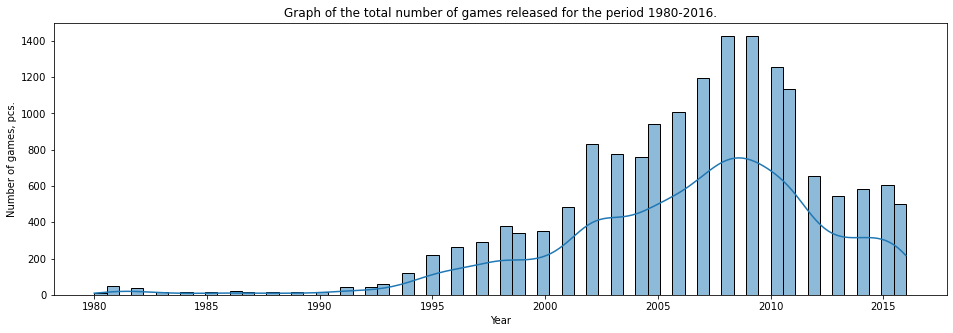

In [13]:
plt.figure(figsize = (16, 5))
plt.title('Graph of the total number of games released for the period 1980-2016.')
sns.histplot(data = data, x = 'year_of_release', kde = True)
plt.ylabel('Number of games, pcs.')
plt.xlabel('Year')
plt.show()

<b>Interim findings:</b><br/>

I consider the data up to 2012 not relevant for research. As many generations of consoles have changed, genres, game mechanics, etc. have changed, the industry has stepped forward. Also according to the article <a href="https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D0%B8%D0%B3%D1%80%D0%BE%D0%B2%D1%8B%D1%85_%D0%BA%D0%BE%D0%BD%D1%81%D0%BE%D0%BB%D0%B5%D0%B9#%D0%9F%D1%8F%D1%82%D0%BE%D0%B5_%D0%BF%D0%BE%D0%BA%D0%BE%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_(1993%E2%80%942005)">List of video game consoles</a>, consoles from 2012 belong to the "eighth generation" of consoles. Therefore, I think it is correct to take into account the data from 2012.<br/> This will narrow down the sample quite a bit, but we will get up-to-date data.

#### <a class="anchor" id="32-bullet"> Let's see how sales have changed across platforms. Let's select the platforms with the highest total sales and build a distribution by year. How long does it take for new platforms to appear and old ones to disappear?</a>

In [14]:
platforms = data.pivot_table(index = ['platform', 'year_of_release'], values = 'total_sales', aggfunc = ['sum']).reset_index()
platforms.columns = ['platform', 'year_of_release', 'total_sales']
platforms.sort_values(by = 'total_sales', ascending = False)

,platform,year_of_release,total_sales
134,PS2,2004,211.809998
200,Wii,2009,206.970001
132,PS2,2002,205.380005
133,PS2,2003,184.309998
199,Wii,2008,171.320007
...,...,...,...
94,PC,1988,0.030000
119,PCFX,1996,0.030000
25,DS,1985,0.020000
23,DC,2007,0.020000


In [15]:
years = platforms.pivot_table(index = ['platform'], values = 'year_of_release', aggfunc = ['count']).reset_index()
years.columns = ['platform', 'years_of_existence']
years.head()

,platform,years_of_existence
0,2600,10
1,3DO,2
2,3DS,6
3,DC,7
4,DS,11


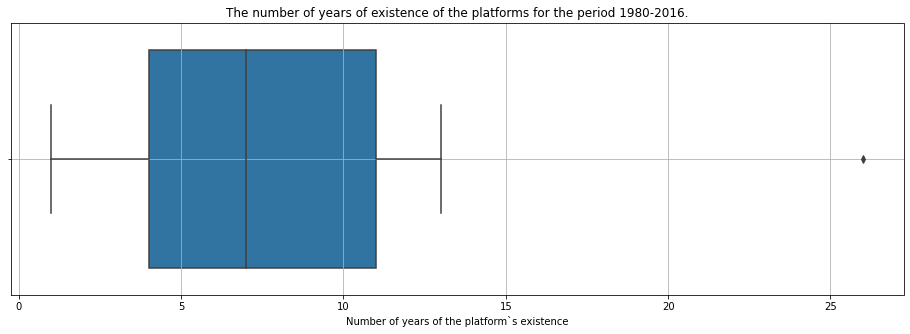

In [16]:
plt.figure(figsize = (16, 5))
plt.title('The number of years of existence of the platforms for the period 1980-2016.')
sns.boxplot(x = years['years_of_existence'])
plt.xlabel('Number of years of the platform`s existence')
plt.grid()
plt.show()

In [17]:
years.describe().T

,count,mean,std,min,25%,50%,75%,max
years_of_existence,31.0,7.677419,5.08191,1.0,4.0,7.0,11.0,26.0


In [18]:
def sales(df, name):
    df.query('platform in @name').groupby(
        'year_of_release')['total_sales'].sum().plot(
        kind='bar', figsize=(16, 5), ec='black', color='#6ab6c0')
    plt.title('Number of copies sold of games released on the platform ' + name)
    plt.xlabel('Year')
    plt.ylabel('Game copies sold, mln.')
    plt.xticks(rotation=0)
    plt.grid(axis='y')
    plt.show()

In [19]:
list_of_platforms = platforms['platform'].unique()

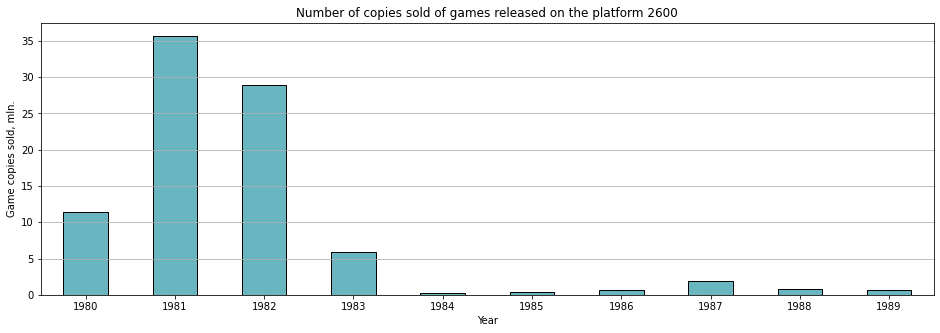

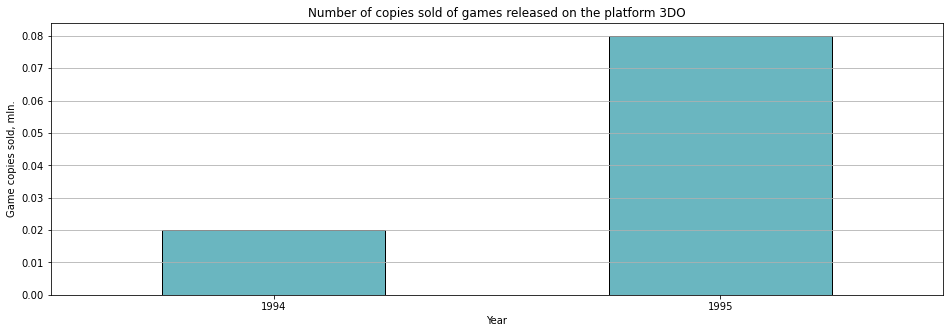

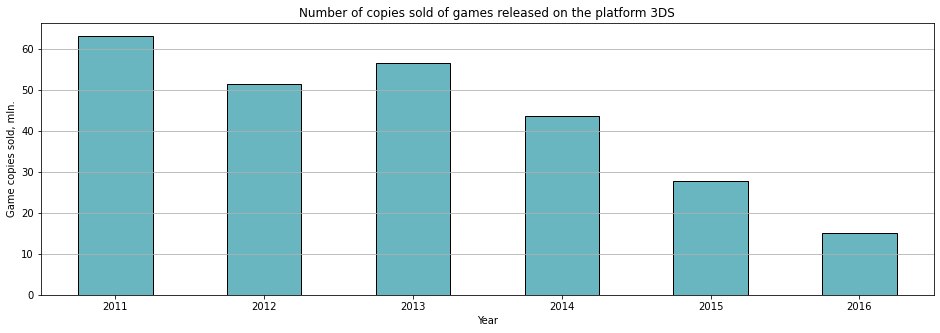

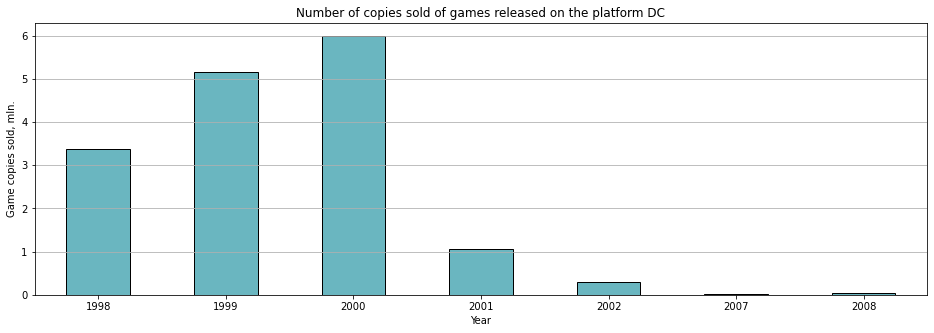

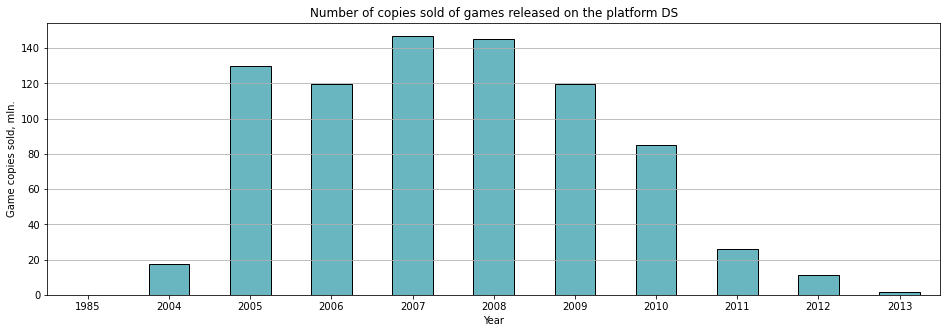

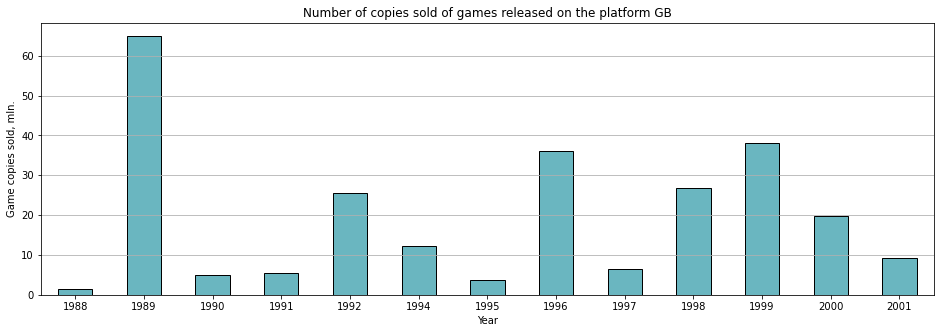

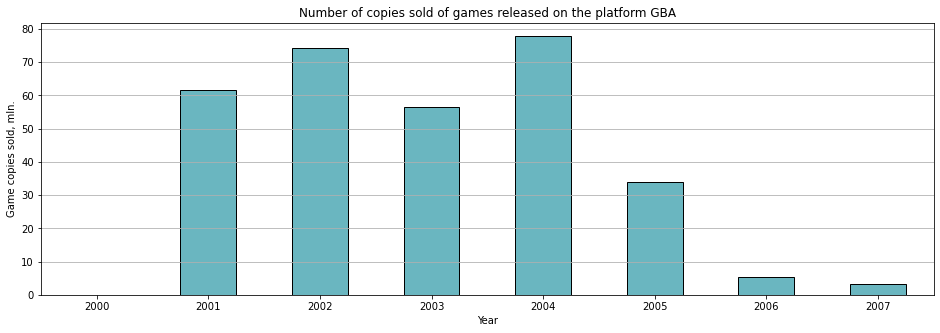

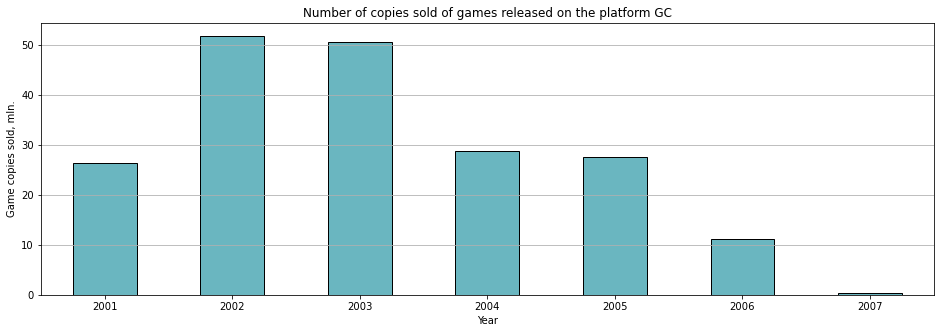

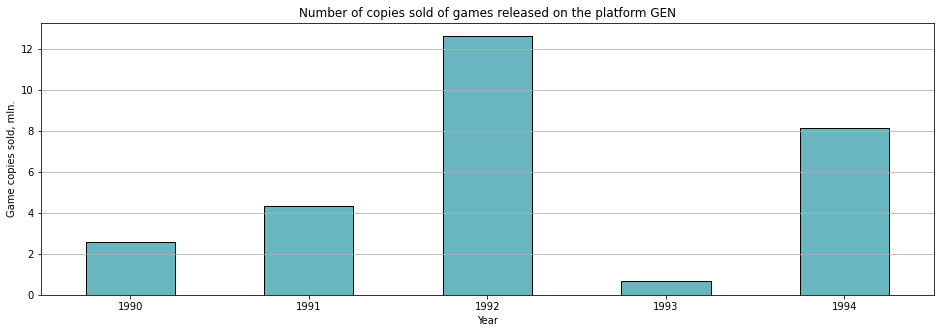

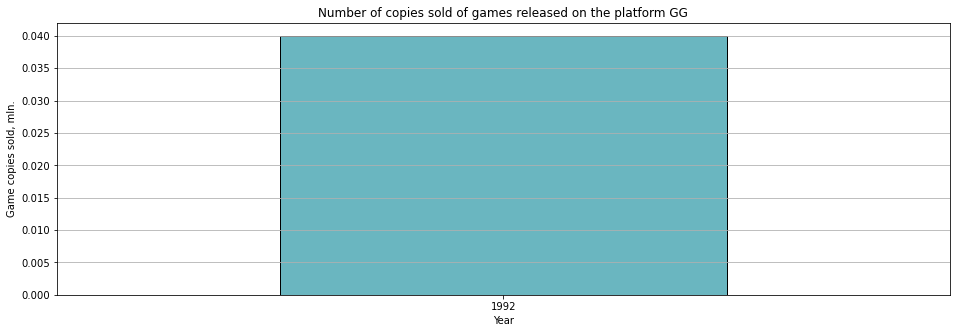

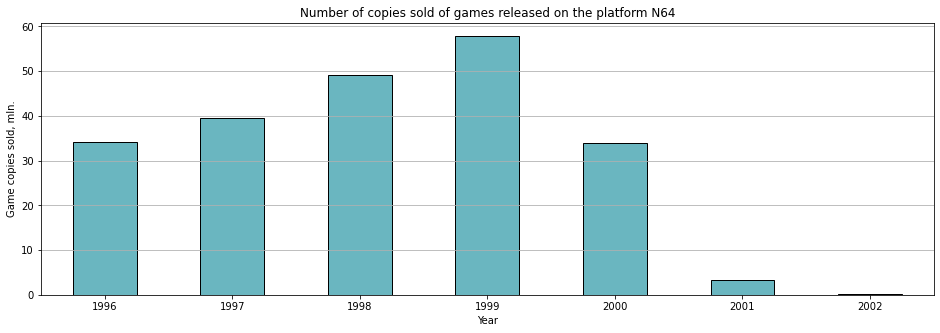

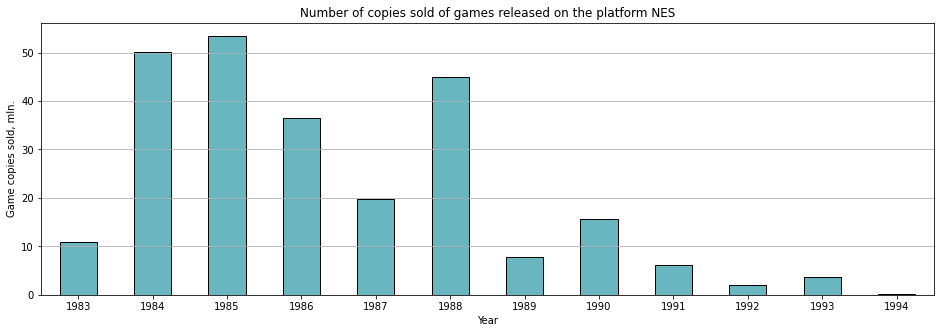

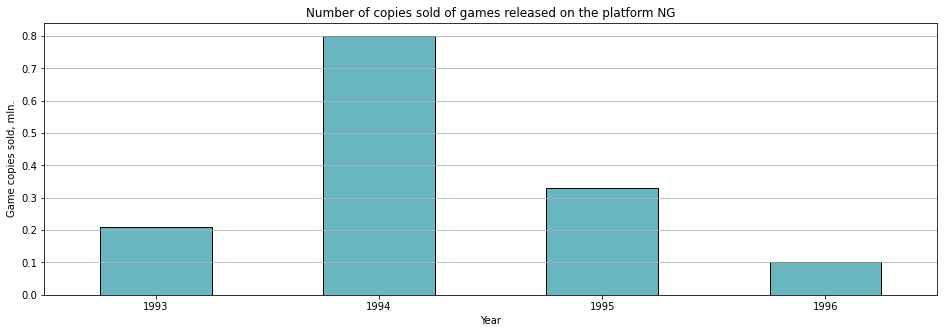

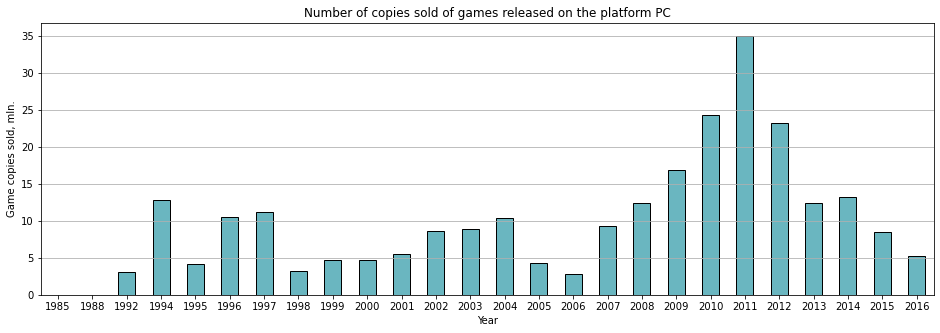

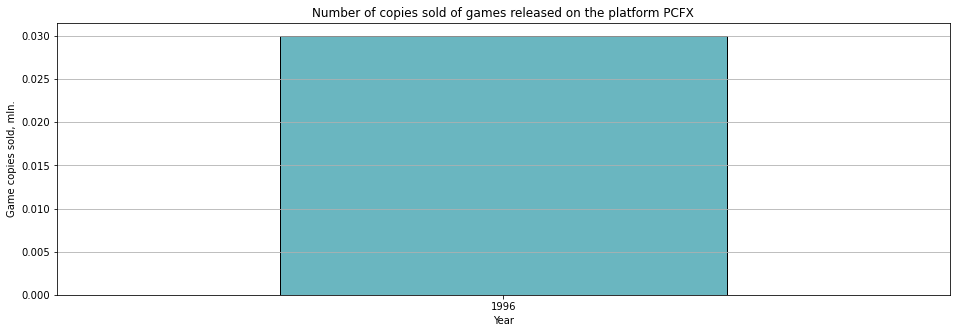

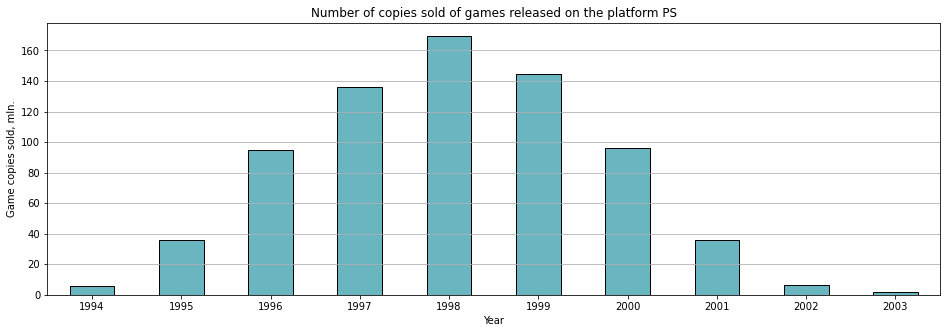

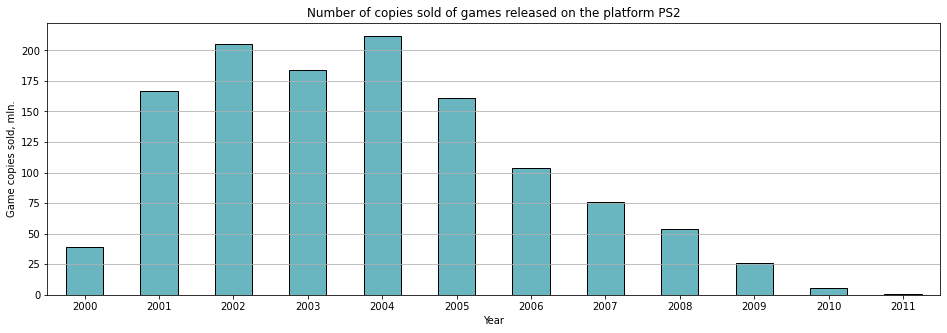

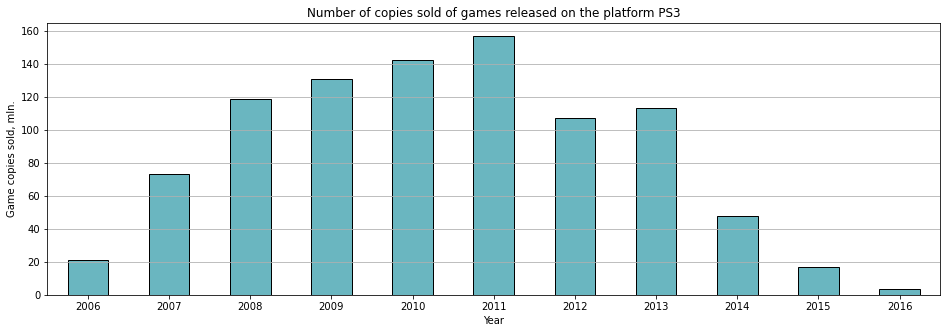

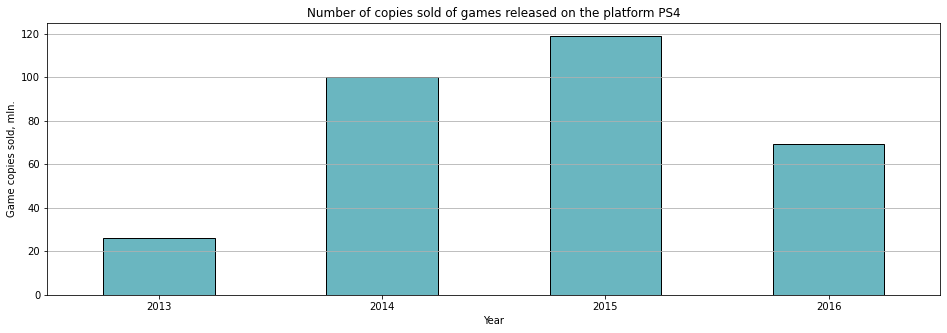

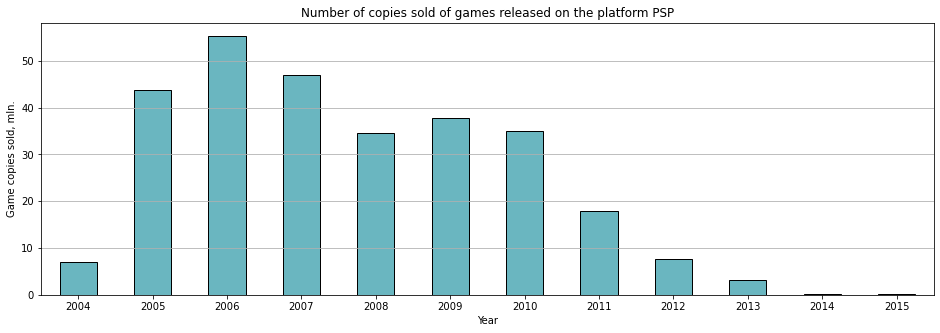

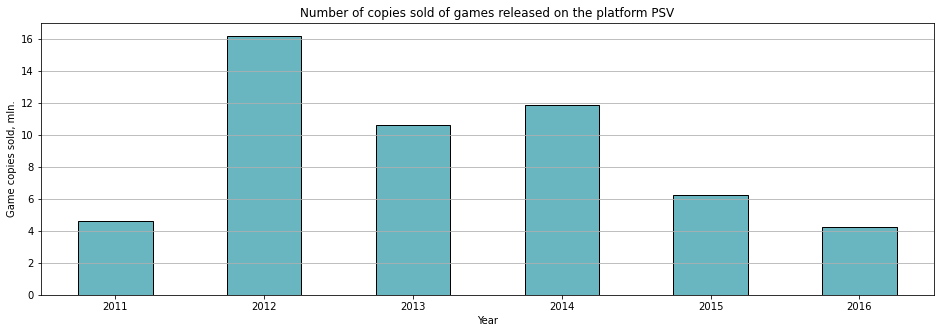

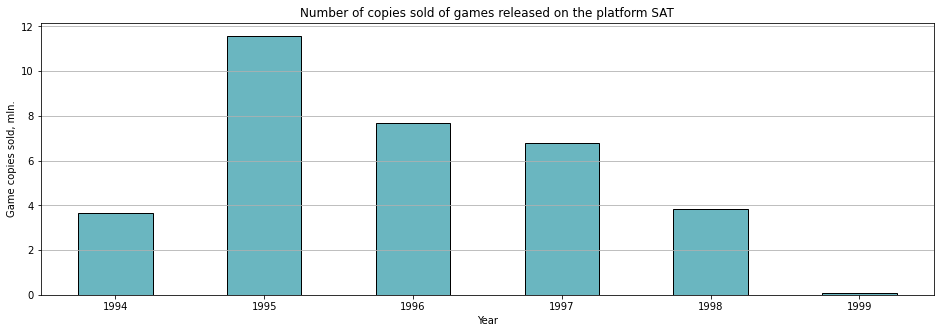

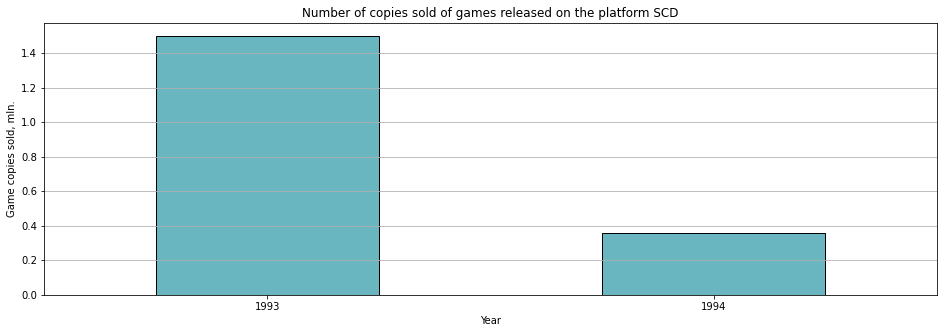

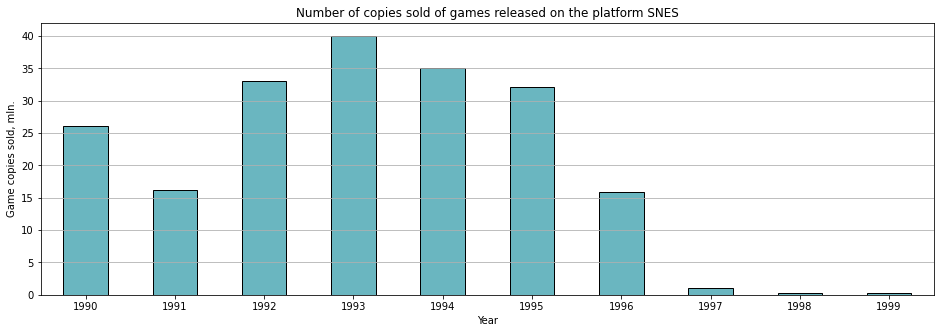

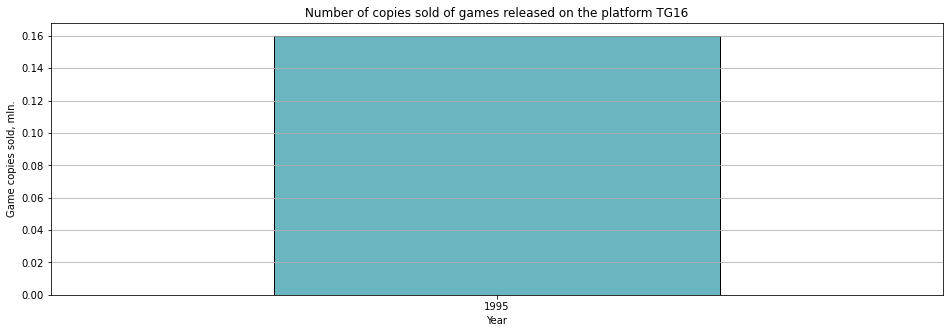

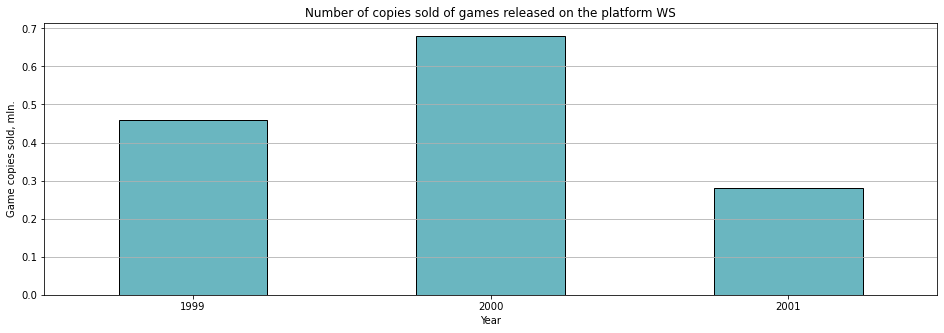

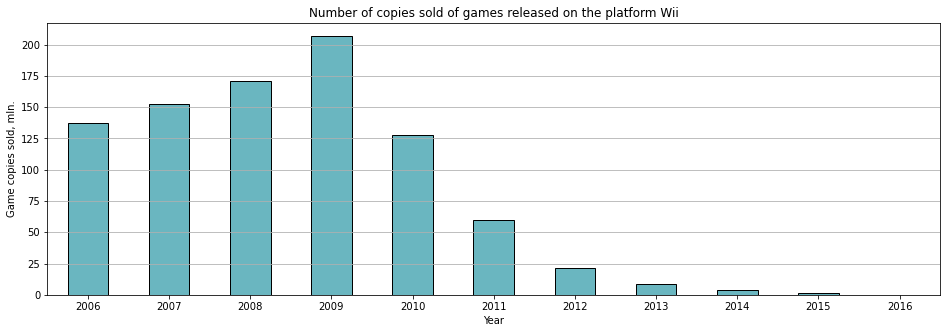

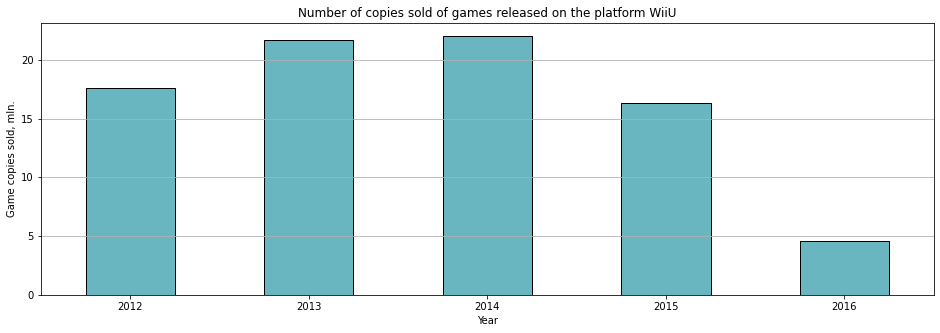

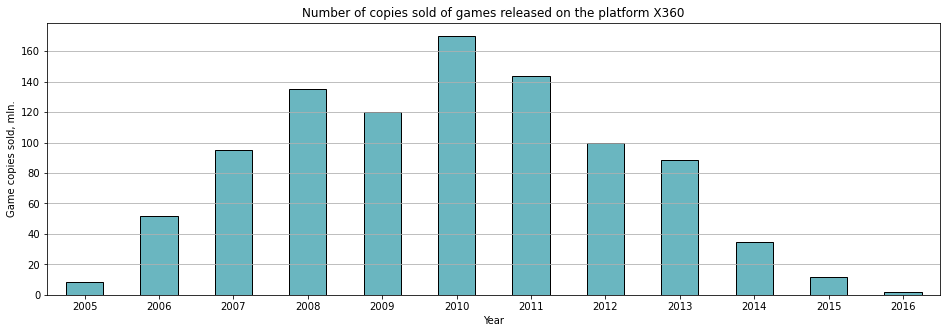

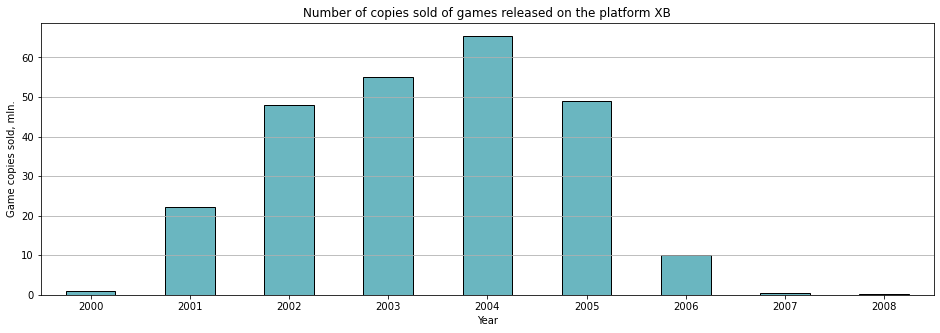

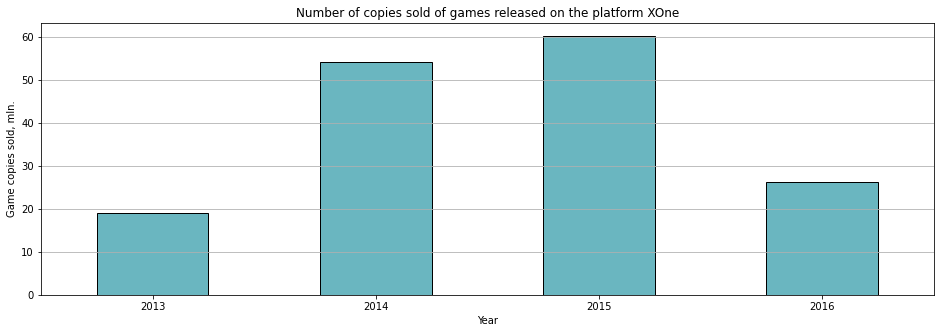

In [20]:
for name in list_of_platforms:
    sales(data, name)

<b>Interim findings:</b><br/>
On average, the platforms have been around for 5 to 8 years, depending on their success in the market. There are exceptions, in the form of a PC platform, which implies all personal computers and their regular updates.<br/> The highest total sales are typical for platforms since 2005.<br/>
The lowest total sales are for platforms that have existed for less than 5 years.

<b>How long does it take for new platforms to appear and old ones to disappear?</b><br/>
We can only draw conclusions about this by studying the charts for platforms that have updates-PS, PS2, PS3, etc., Xbox.
According to the charts, the average life of the Sony PS platform and subsequent generations is about 6 years.<br/>
Wii, Wii U, Xbox-show similar results.

#### <a class="anchor" id="33-bullet"> Let's take the data for the corresponding current period for the study </a>
Let's determine the current period yourself as a result of the research of the previous questions.<br/>
The main factor is that this data will help to build a forecast for 2017.<br/>
Do not take into account data from previous years.<br/>

<b>In the previous step, we determined the threshold for the relevance of the data for the study starting from 2012. We will investigate them.</b>

In [21]:
actual_data = data.query('year_of_release >= 2012')
actual_platforms = actual_data['platform'].unique()

#### <a class="anchor" id="34-bullet"> Let's determine which platforms are leading in sales, rising or falling? <br/></a>
Let's choose several potentially profitable platforms.

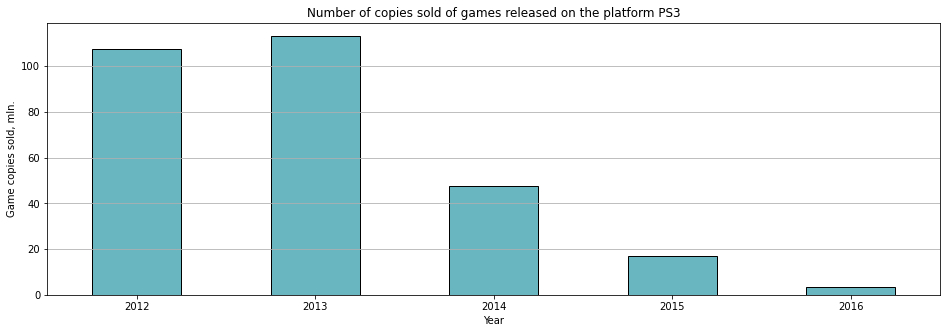

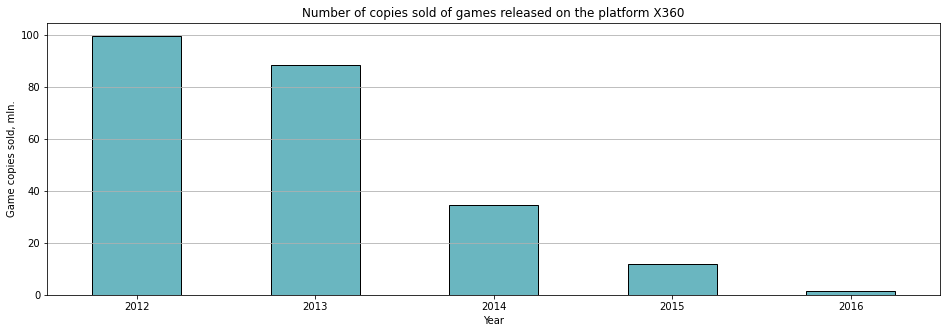

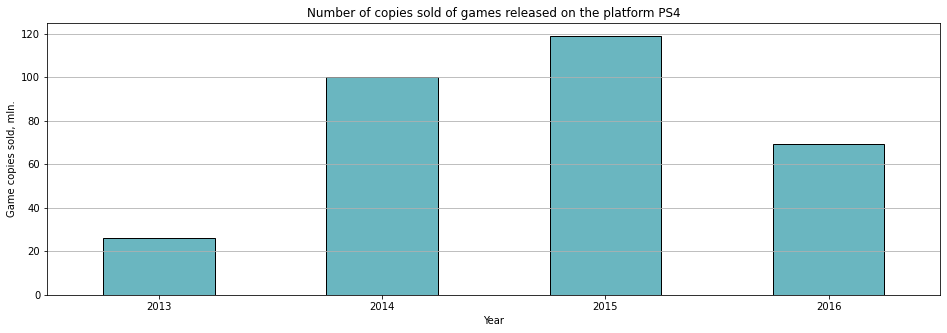

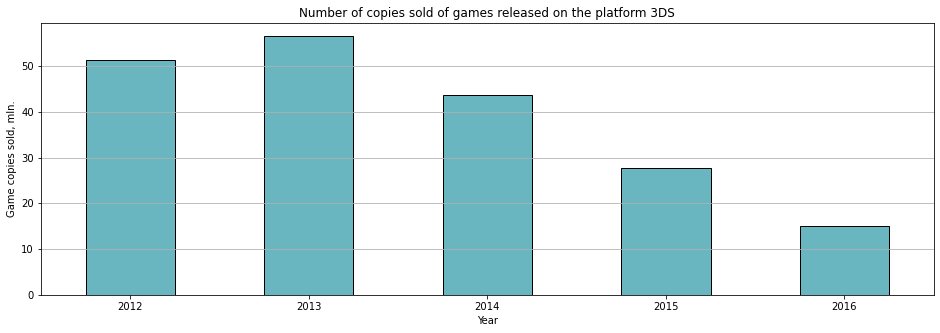

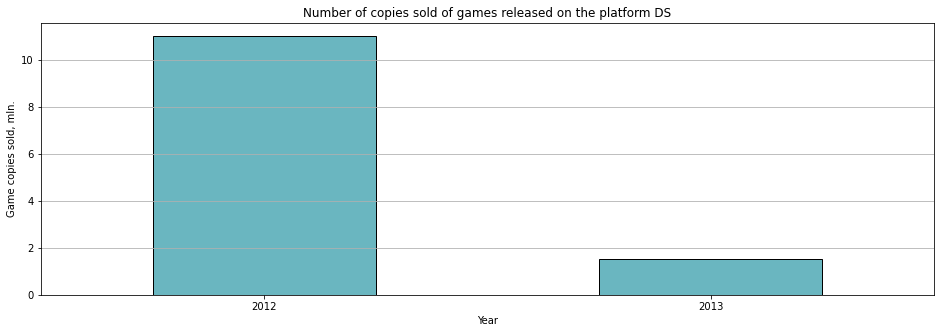

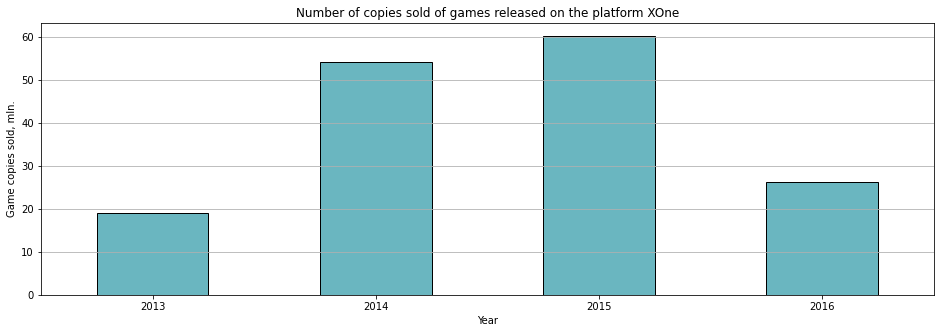

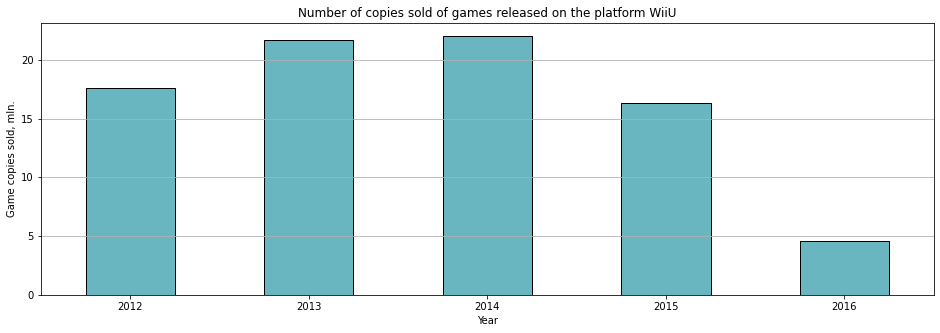

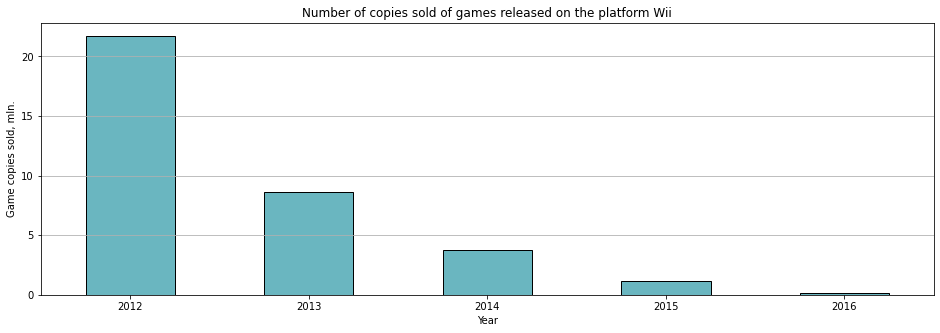

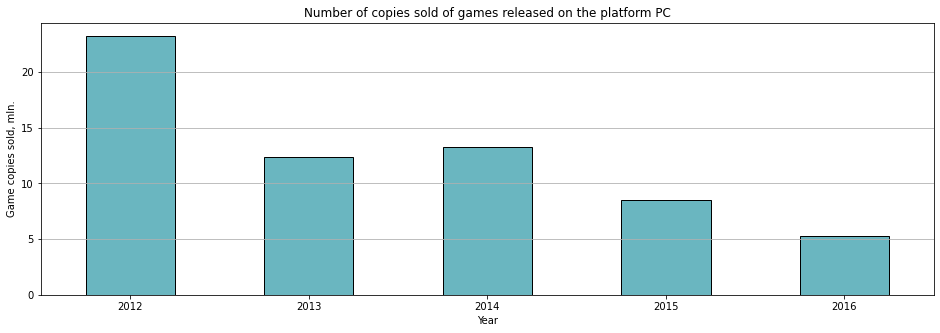

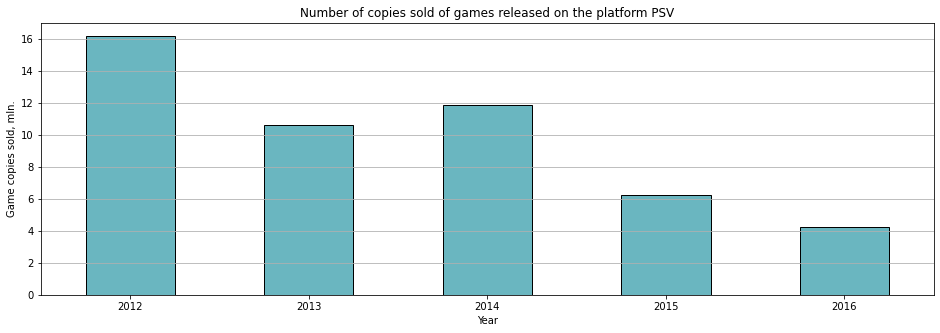

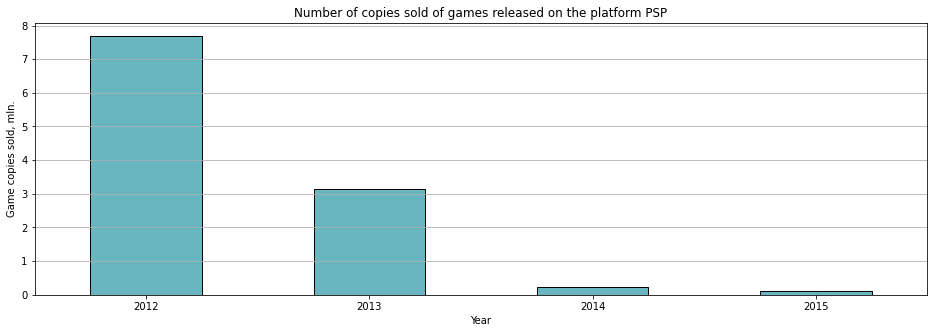

In [22]:
plt.xticks(rotation = 0)
for name in actual_platforms:
    sales(actual_data, name)

<b>Interim findings:</b><br/>
Most of the platforms presented are falling in sales figures.<br/>
Potentially profitable platforms are those that have a positive sales trend, starting from 2012-2014, given the lifetime of the platform.<br/>

<b>Potentially the most profitable platforms:</b><br/>
PS4 - about 120 million in 2015<br/>
XOne - about 60 million in 2015<br/>

#### <a class="anchor" id="35-bullet"> Let's plot the "box with a mustache" chart for global game sales, broken down by platform. Let's describe the result.</a>

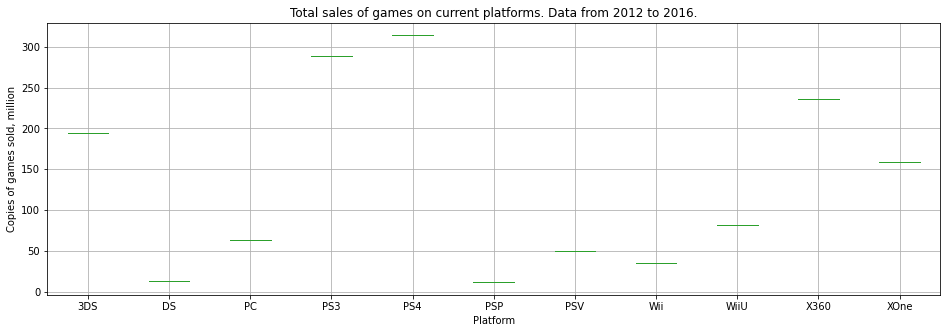

In [23]:
(actual_data
 .pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum')
 .T
 .plot(kind = 'box', figsize = (16, 5), grid = True)
)
plt.title('Total sales of games on current platforms. Data from 2012 to 2016.')
plt.xlabel('Platform')
plt.ylabel('Copies of games sold, million')
#plt.ylim(0, 250)
plt.show()

<b>Interim findings:</b><br/>
The PS4 has already surpassed the PS3's total sales.
And the PS4 platform will remain relevant for at least another 3-4 years. This is a clear market leader.
<br/>
<b>XOne</b> has not yet beaten the sales figures of the previous model <b>X360</b>.
But the None platform will also remain relevant for at least another 3-4 years. And it is likely to surpass its predecessor in total sales. But it will still lag behind the PS4.

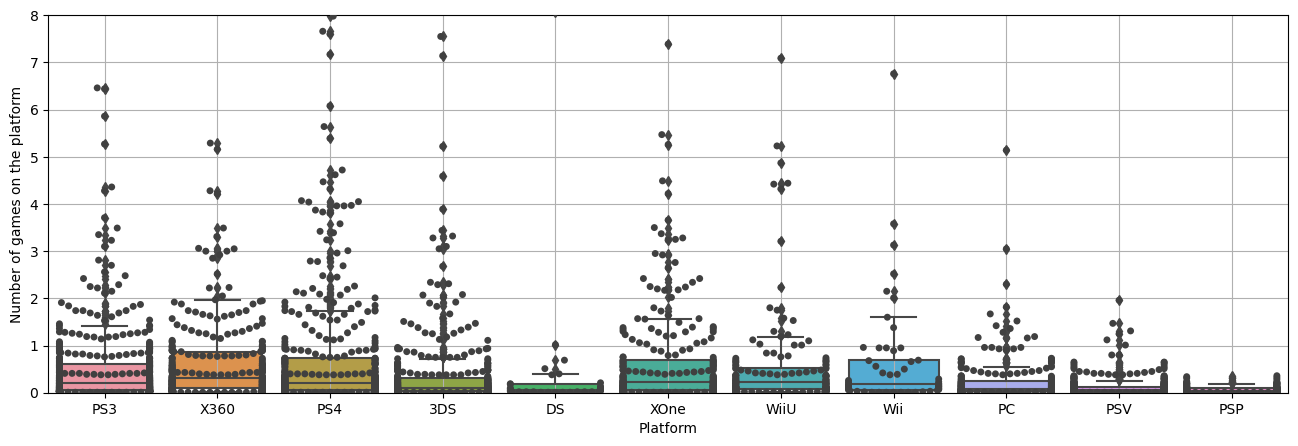

In [24]:
plt.figure(figsize = (16, 5), dpi = 100)
ax = sns.boxplot(x = "platform", y = "total_sales", data = actual_data)
ax = sns.swarmplot(x = "platform", y = "total_sales", data = actual_data, color = ".25")
plt.xlabel('Platform')
plt.ylabel('Number of games on the platform')
plt.ylim(0, 8)
plt.grid()
plt.show()

#### <a class="anchor" id="36-bullet"> Let's see how the reviews of users and critics affect sales within one popular platform. Let's build a scatter plot and calculate the correlation between reviews and sales. Let's formulate conclusions.</a>

We do not have any additional data that would allow us to restore the omissions in the ratings and ratings.<br/> Given the general subjectivity of reviews and ratings as such , it makes no sense to replace these values with average or median values.<br/>

Since we have to research sales within one popular platform, we choose the PS4 for research.

In [25]:
ps4 = actual_data.query('platform == "PS4"')
ps4.loc[ps4['user_score'] == 'tbd', 'user_score'] = 'NaN'
ps4['user_score'] = ps4['user_score'].astype('float64')

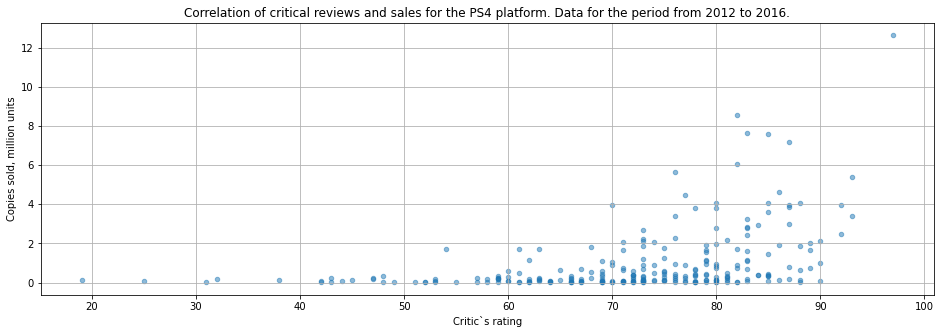

In [26]:
ps4.plot(x = 'critic_score', y = 'total_sales', kind = 'scatter', alpha = 0.5, figsize = (16,5))
plt.title('Correlation of critical reviews and sales for the PS4 platform. Data for the period from 2012 to 2016.')
plt.xlabel('Critic`s rating')
plt.ylabel('Copies sold, million units')
plt.grid()
plt.show()

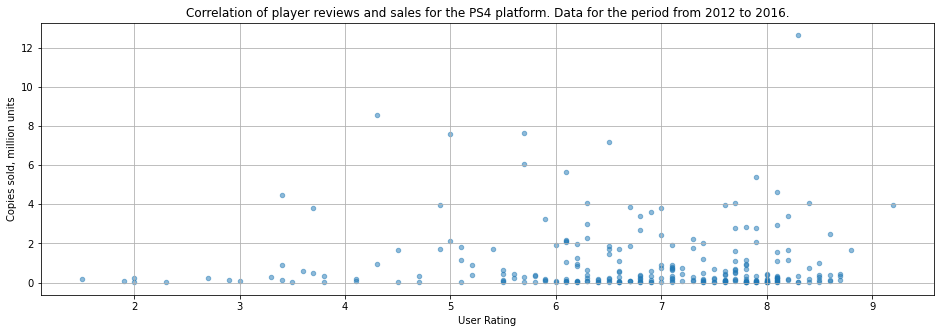

In [27]:
ps4.plot(x = 'user_score', y = 'total_sales', kind = 'scatter', alpha = 0.5, figsize = (16,5))
plt.title('Correlation of player reviews and sales for the PS4 platform. Data for the period from 2012 to 2016.')
plt.xlabel('User Rating')
plt.ylabel('Copies sold, million units')
plt.grid()
plt.show()

In [28]:
ps4.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.248961,-0.208306,-0.060993,-0.234796,-0.021142,0.152447,-0.235032
na_sales,-0.248961,1.000000,0.785362,0.472981,0.944259,0.415008,-0.020933,0.928160
eu_sales,-0.208306,0.785362,1.000000,0.464563,0.944698,0.346720,-0.048925,0.958157
jp_sales,-0.060993,0.472981,0.464563,1.000000,0.496467,0.322358,0.171332,0.527129
other_sales,-0.234796,0.944259,0.944698,0.496467,1.000000,0.409191,-0.035639,0.998051
critic_score,-0.021142,0.415008,0.346720,0.322358,0.409191,1.000000,0.557654,0.406568
user_score,0.152447,-0.020933,-0.048925,0.171332,-0.035639,0.557654,1.000000,-0.031957
total_sales,-0.235032,0.928160,0.958157,0.527129,0.998051,0.406568,-0.031957,1.000000


<b>Interim findings:</b><br/>
For the most popular platform, the PS4 - Pearson correlation coefficient for critical reviews and total sales is quite large-0.4065.<br/>
The coefficient for user reviews is negative and close to zero. Which means that user ratings have almost no effect on overall sales.<br/>

For the most part, the ratings of critics and users are similar in their indicators.<br/> 
There are a small number of games with low user ratings, but still quite good sales.
<br/>
As expected, games with low ratings, both among critics and among players, sell quite poorly.

#### <a class="anchor" id="37-bullet"> Let's correlate the findings with the sales of games on other platforms.</a>

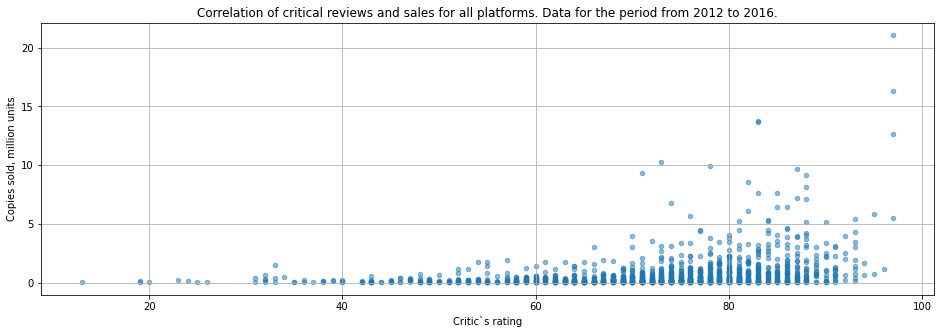

In [29]:
actual_data.plot(x = 'critic_score', y = 'total_sales', kind = 'scatter', alpha = 0.5, figsize = (16,5))
plt.title('Correlation of critical reviews and sales for all platforms. Data for the period from 2012 to 2016.')
plt.xlabel('Critic`s rating')
plt.ylabel('Copies sold, million units')
plt.grid()
plt.show()

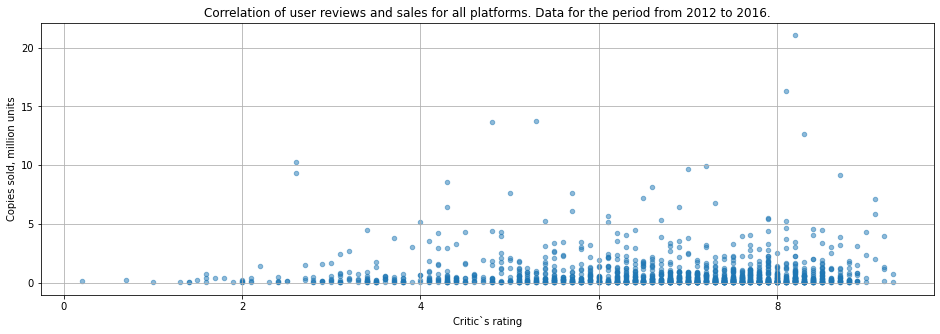

In [30]:
actual_data.plot(x = 'user_score', y =  'total_sales', kind = 'scatter', alpha = 0.5, figsize = (16,5))
plt.title('Correlation of user reviews and sales for all platforms. Data for the period from 2012 to 2016.')
plt.xlabel('Critic`s rating')
plt.ylabel('Copies sold, million units')
plt.grid()
plt.show()

In [31]:
actual_data.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.092848,-0.053163,-0.063587,-0.057375,0.014969,-0.019996,-0.083488
na_sales,-0.092848,1.000000,0.767484,0.271010,0.792277,0.290240,-0.014217,0.920981
eu_sales,-0.053163,0.767484,1.000000,0.265134,0.936906,0.283254,-0.022042,0.927487
jp_sales,-0.063587,0.271010,0.265134,1.000000,0.203078,0.116596,0.163980,0.450363
other_sales,-0.057375,0.792277,0.936906,0.203078,1.000000,0.272509,-0.010909,0.909525
critic_score,0.014969,0.290240,0.283254,0.116596,0.272509,1.000000,0.517727,0.308197
user_score,-0.019996,-0.014217,-0.022042,0.163980,-0.010909,0.517727,1.000000,0.004429
total_sales,-0.083488,0.920981,0.927487,0.450363,0.909525,0.308197,0.004429,1.000000


<b>Interim findings:</b><br/>
The scatterplots of critics 'and users' reviews for all platforms are similar to the scatterplots for PS4.<br/>
The correlation coefficient between critical reviews and sales, for all platforms, is slightly lower (0.308197). But these are still positive values that have an impact on overall sales, although to a lesser extent.<br/> 

A positive correlation for user reviews and sales shows that reviews still have an impact on overall sales across all platforms.<br/>

#### <a class="anchor" id="38-bullet"> Let's look at the overall distribution of games by genre. What can you say about the most profitable genres? Do genres with high and low sales stand out? </a>

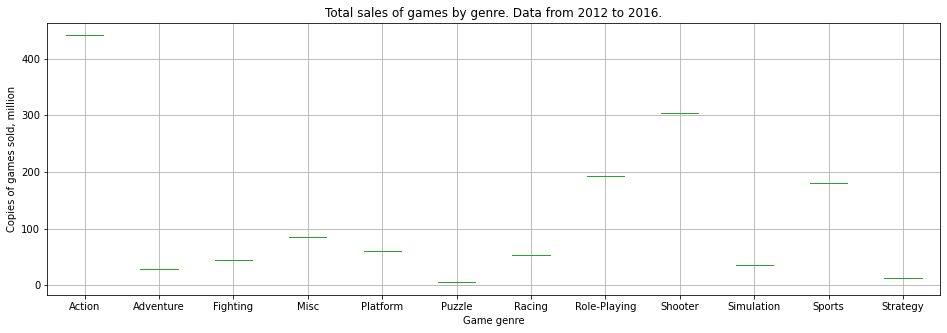

In [32]:
(actual_data
 .pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum')
 .T
 .plot(kind = 'box', figsize = (16, 5), grid = True)
)
plt.title('Total sales of games by genre. Data from 2012 to 2016.')
plt.xlabel('Game genre')
plt.ylabel('Copies of games sold, million')
plt.show()

<b>Interim findings:</b><br/>
The most profitable genres are Action, Shooter, Role - Playing, and Sport. The total sales of these genres are a multiple of all the other genres together.
The lowest sales in the genres-Puzzle, Strategy. 
The rest of the genres make up some "average" segment, but sales do not exceed 100 million copies for the entire genre.

### <a class="anchor" id="4-bullet"> Step 4. Create a user profile for each region.</a>

####  Define for the user of each region (NA, EU, JP):<br/>
#### <a class="anchor" id="41-bullet"> The most popular platforms (top 5). Let's describe the differences in sales shares.<br/></a>

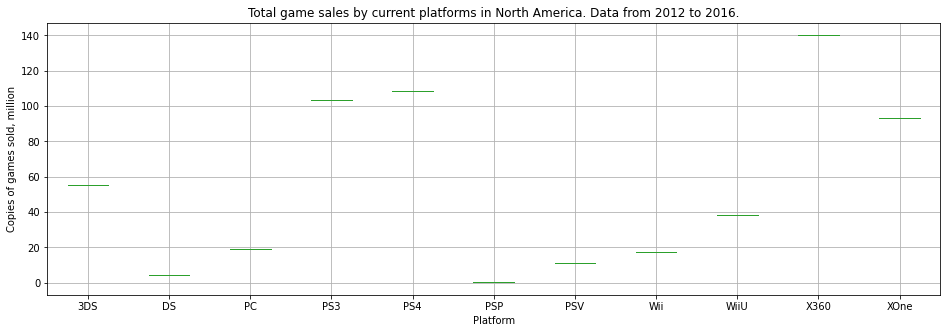

In [33]:
(actual_data
 .pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum')
 .T
 .plot(kind = 'box', figsize = (16, 5), grid = True)
)
plt.title('Total game sales by current platforms in North America. Data from 2012 to 2016.')
plt.xlabel('Platform')
plt.ylabel('Copies of games sold, million')
plt.show()

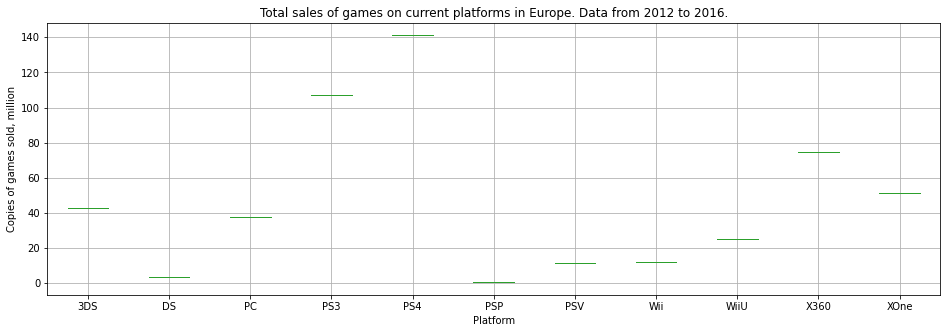

In [34]:
(actual_data
 .pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum')
 .T
 .plot(kind = 'box', figsize = (16, 5), grid = True)
)
plt.title('Total sales of games on current platforms in Europe. Data from 2012 to 2016.')
plt.xlabel('Platform')
plt.ylabel('Copies of games sold, million')
plt.show()

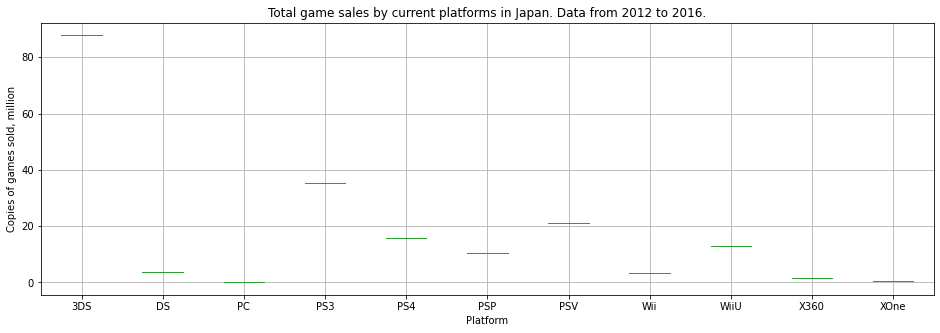

In [35]:
(actual_data
 .pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum')
 .T
 .plot(kind = 'box', figsize = (16, 5), grid = True)
)
plt.title('Total game sales by current platforms in Japan. Data from 2012 to 2016.')
plt.xlabel('Platform')
plt.ylabel('Copies of games sold, million')
plt.show()

<b>Interim findings:</b><br/><br/>
<b>Tor-5 platforms</b><br/><br/>
<b>For the North American market.</b>
<br/>1. X360 - 140 million
<br/>2. PS4 - about 110 million.
<br/>3. PS3 - about 102 million.
<br/>4. XOne - about 94 million.
<br/>5. 3DS - about 55 million.
<br/><br/>
<b>For the European market.</b>
<br/>1. PS4 - just over 140 million.
<br/>2. PS3 - about 108 million.
<br/>3. X360 - about 75 million.
<br/>4. XOne - 50 million.
<br/>5. 3DS - about 42 million.
<br/><br/>
<b>For the Japanese market.</b>
<br/>1. 3DS - about 85 million.
<br/>2. PS3 - about 35 million.
<br/>3. PSV - just over 20 million.
<br/>4. PS4 - about 15 million.
<br/>5. Wii U - about 12 million. 
<br/><br/>

The North American market is the largest.<br/>
Sales in Europe are in second place after NA.<br/>
The Japanese market is the smallest. <br/>

#### <a class="anchor" id="42-bullet"> The most popular genres (top 5). Let's explain the difference.</a>

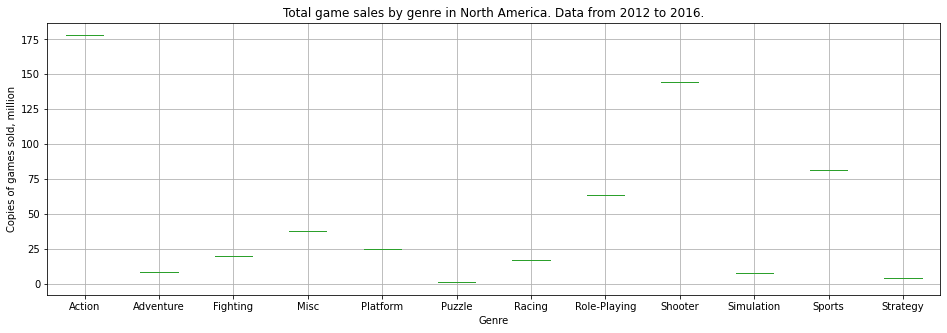

In [36]:
(actual_data
 .pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum')
 .T
 .plot(kind = 'box', figsize = (16, 5), grid = True)
)
plt.title('Total game sales by genre in North America. Data from 2012 to 2016.')
plt.xlabel('Genre')
plt.ylabel('Copies of games sold, million')
plt.show()

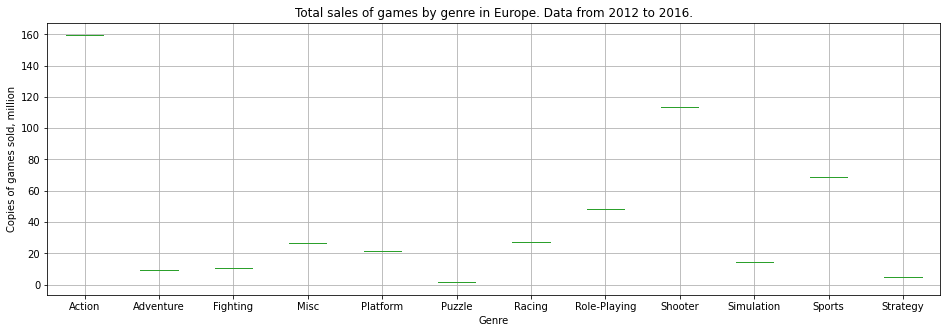

In [37]:
(actual_data
 .pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum')
 .T
 .plot(kind = 'box', figsize = (16, 5), grid = True)
)
plt.title('Total sales of games by genre in Europe. Data from 2012 to 2016.')
plt.xlabel('Genre')
plt.ylabel('Copies of games sold, million')
plt.show()

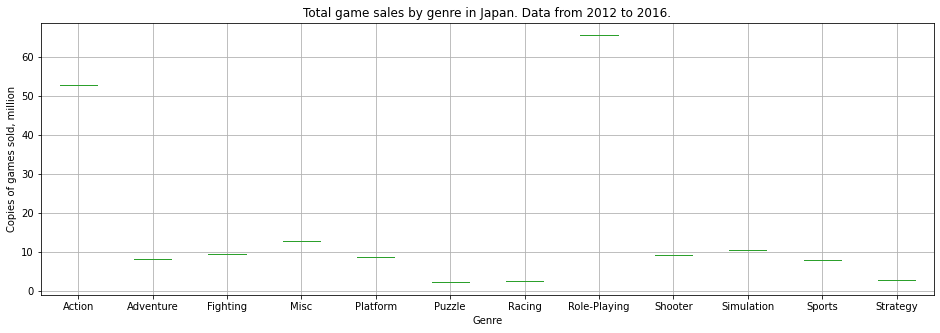

In [38]:
(actual_data
 .pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum')
 .T
 .plot(kind = 'box', figsize = (16, 5), grid = True)
)
plt.title('Total game sales by genre in Japan. Data from 2012 to 2016.')
plt.xlabel('Genre')
plt.ylabel('Copies of games sold, million')
plt.show()

<b>Interim findings:</b><br/><br/>
<b>Tor-5 genres.</b><br/><br/>
<b>For the North American market.</b>
<br/>1. Action - just over 175 million.
<br/>2. Shooter - about 140 million.
<br/>3. Sport - about 80 million.
<br/>4. Role-Playing - about 63 million.
<br/>5. Misc - about 37 million.
<br/><br/>
<b>For the European market.</b>
<br/>1. Action - just over 160 million.
<br/>2. Shooter - about 112 million.
<br/>3. Sport - about 68 million.
<br/>4. Role-Playing - about 49 million.
<br/>5. Misc - about 25 million.
<br/><br/>
<b>For the Japanese market.</b>
<br/>1. Role-Playing - about 65 million.
<br/>2. Action - about 53 million.
<br/>3. Misc - about 12 million.
<br/>4. Simulation - just over 10 million.
<br/>5. Fighting - just under 10 million.
<br/><br/>

The preferences of players from North America and Europe are similar. The only difference is in the number of copies sold, NA is in the lead.<br/>
The tastes of players in Japan are diametrically opposed. Players prefer role-playing games and simulators.

#### <a class="anchor" id="43-bullet"> Does the ESRB rating affect sales in a particular region?</a>

In [39]:
# RP - Rating Pending
actual_data['rating'] = actual_data['rating'].fillna('RP')

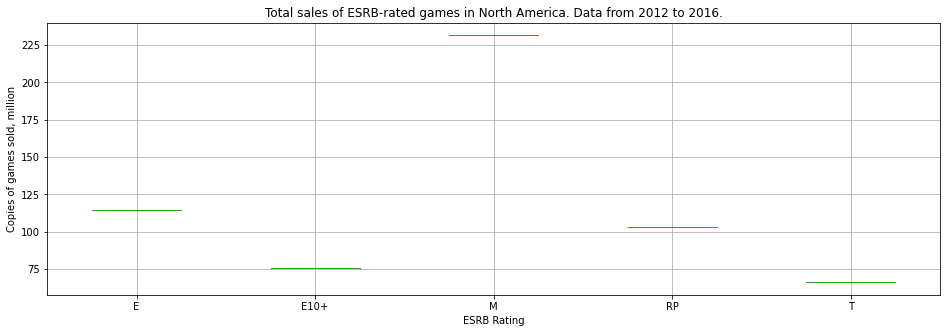

In [40]:
(actual_data
 .pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'sum')
 .T
 .plot(kind = 'box', figsize = (16, 5), grid = True)
)
plt.title('Total sales of ESRB-rated games in North America. Data from 2012 to 2016.')
plt.xlabel('ESRB Rating')
plt.ylabel('Copies of games sold, million')
plt.show()

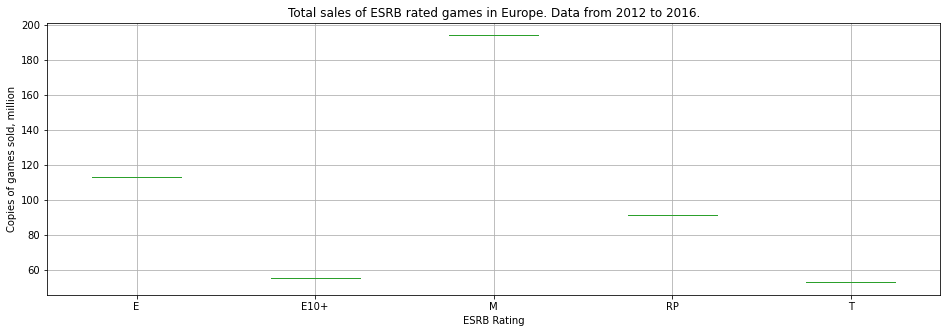

In [41]:
(actual_data
 .pivot_table(index = 'rating', values = 'eu_sales', aggfunc = 'sum')
 .T
 .plot(kind = 'box', figsize = (16, 5), grid = True)
)
plt.title('Total sales of ESRB rated games in Europe. Data from 2012 to 2016.')
plt.xlabel('ESRB Rating')
plt.ylabel('Copies of games sold, million')
plt.show()

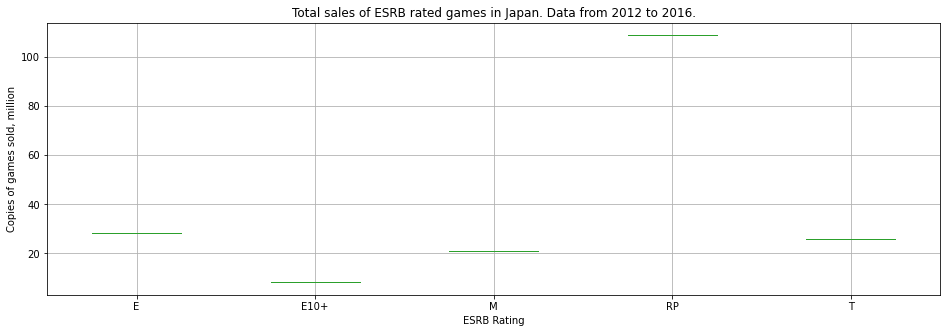

In [42]:
(actual_data
 .pivot_table(index = 'rating', values = 'jp_sales', aggfunc = 'sum')
 .T
 .plot(kind = 'box', figsize = (16, 5), grid = True)
)
plt.title('Total sales of ESRB rated games in Japan. Data from 2012 to 2016.')
plt.xlabel('ESRB Rating')
plt.ylabel('Copies of games sold, million')
plt.show()

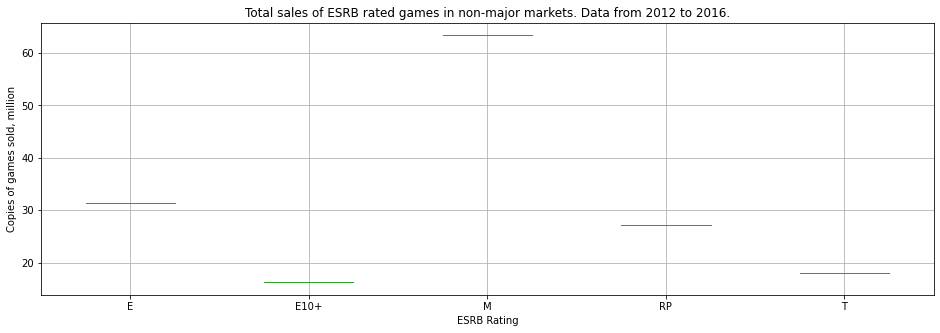

In [43]:
(actual_data
 .pivot_table(index = 'rating', values = 'other_sales', aggfunc = 'sum')
 .T
 .plot(kind = 'box', figsize = (16, 5), grid = True)
)
plt.title('Total sales of ESRB rated games in non-major markets. Data from 2012 to 2016.')
plt.xlabel('ESRB Rating')
plt.ylabel('Copies of games sold, million')
plt.show()

In [44]:
rp = actual_data[actual_data['rating'] == 'RP']
rp['total_sales'].sum()

330.82

<b>Interim findings:</b><br/><br/>
<b>The impact of the ESRB rating on sales in the region.</b><br/><br/>
<b>For the North American market.</b>
<br/>1. M - more than 225 million.
<br/>2. E-about 113 million.
<br/>3. E10+ - about 75 million.
<br/>4. T - about 70 million.
<br/><br/>
<b>For the European market.</b>
<br/>1. M - more than 195 million.
<br/>2. E - about 112 million.
<br/>3. E10+ - about 68 million.
<br/>4. T - about 66 million.
<br/><br/>
<b>For the Japanese market.</b>
<br/>1. E - more than 28 million.
<br/>2. T - about 26 million.
<br/>3. M - about 21 million.
<br/>4. E10+ - about 8 million.
<br/><br/>
50 games, with a total of 3.15 million copies sold, are not rated.

In the markets of North America and Europe, the ratings are similar. The difference is only in the number of copies sold, with NA leading the way.<br/>
In Japan, category E games are in the leading positions. The specifics of the audience imply other categories of games and ratings.

<b>Conclusions for step 4</b><br/>

<b>1. User profile for the North American market.<br/>
Most preferred platforms:</b>
<br/>1. X360 - 140 million
<br/>2. PS4 - about 110 million.
<br/>3. PS3 - about 102 million.
<br/>4. XOne - about 94 million.
<br/>5. 3DS - about 55 million.
<br/><br/>
<b>Most preferred genres:</b>
<br/>1. Action - just over 175 million.
<br/>2. Shooter - about 140 million.
<br/>3. Sport - about 80 million.
<br/>4. Role-Playing - about 63 million.
<br/>5. Misc - about 37 million.
<br/><br/>
<b>Grading of games by ESRB rating:</b>
<br/>1. M - more than 225 million.
<br/>2. E-about 113 million.
<br/>3. E10+ - about 75 million.
<br/>4. T - about 70 million.
<br/><br/>

<b>2. User profile for the European market.<br/>
Most preferred platforms:</b>
<br/>1. PS4 - just over 140 million.
<br/>2. PS3 - about 108 million.
<br/>3. X360 - about 75 million.
<br/>4. XOne - 50 million.
<br/>5. 3DS - about 42 million.
<br/><br/>
<b>Most preferred genres:</b>
<br/>1. Action - just over 160 million.
<br/>2. Shooter - about 112 million.
<br/>3. Sport - about 68 million.
<br/>4. Role-Playing - about 49 million.
<br/>5. Misc - about 25 million.
<br/><br/>
<b>Grading of games by ESRB rating:</b>
<br/>1. M - more than 195 million.
<br/>2. E - about 112 million.
<br/>3. E10+ - about 68 million.
<br/>4. T - about 66 million.
<br/><br/>

<b>3. User portrait for the Japanese market.<br/>
Most preferred platforms:</b>
<br/>1. 3DS - about 85 million.
<br/>2. PS3 - about 35 million.
<br/>3. PSV - just over 20 million.
<br/>4. PS4 - about 15 million.
<br/>5. WiiU - about 12 million. 
<br/><br/>
<b>Most preferred genres:</b>
<br/>1. Role-Playing - about 65 million.
<br/>2. Action - about 53 million.
<br/>3. Misc - about 12 million.
<br/>4. Simulation - just over 10 million.
<br/>5. Fighting - just under 10 million.
<br/><br/>
<b>Grading of games by ESRB rating:</b>
<br/>1. E - more than 28 million.
<br/>2. T - about 26 million.
<br/>3. M - about 21 million.
<br/>4. E10+ - about 8 million.

### <a class="anchor" id="5-bullet"> Step 5. Let's test the hypotheses</a>

#### <a class="anchor" id="51-bullet"> The average user ratings of the Xbox One and PC platforms are the same</a>

Before testing hypotheses, we exclude omissions from the actual_data dataset to avoid errors when testing hypotheses.

In [45]:
actual_data.dropna(subset = ['user_score'], inplace = True)

We get 1531 rows of data for stat analysis, which should be enough.

We formulate the null hypothesis and alternative hypotheses.

H0 - The average user ratings of the Xbox One and PC platforms are the same.

H1-The average user ratings of the Xbox One and PC platforms are not the same.

Checking the sample variance.

In [46]:
x = actual_data['user_score']
variance = np.var(x, ddof = 1)
print(variance)

2.4618644143048027


In [47]:
# we use p-value to test the hypothesis

sample_1 = actual_data[actual_data['platform'] == 'XOne']['user_score']
sample_2 = actual_data[actual_data['platform'] == 'PC']['user_score']
results = st.ttest_ind(sample_1, sample_2, equal_var = True)
alpha = 0.05

print('p-value: ', results.pvalue)
if results.pvalue < alpha:
    print('We accept an alternative hypothesis')
else:
    print('It is impossible to refute the null hypothesis')

p-value:  0.5535080500643661
It is impossible to refute the null hypothesis


#### <a class="anchor" id="52-bullet"> Average user ratings of the genres Action and Sports different.</a>

We formulate the null hypothesis and alternative hypotheses.

H0 - Average user ratings of the genres Action and Sports are different.

H1 - Average user ratings of the genres Action and Sports are not different.

In [48]:
# we use p-value to test the hypothesis

sample_1 = actual_data[actual_data['genre'] == 'Action']['user_score']
sample_2 = actual_data[actual_data['genre'] == 'Sports']['user_score']
results = st.ttest_ind(sample_1, sample_2, equal_var = True)
alpha = 0.05

print('p-value: ', results.pvalue)
if results.pvalue < alpha:
    print('We accept an alternative hypothesis')
else:
    print('It is impossible to refute the null hypothesis')

p-value:  3.7163089460934874e-26
We accept an alternative hypothesis


<b>Interim findings:</b><br/>
<b>The average user ratings of the Xbox One and PC platforms are the same.</b><br/>

H0 - The average user ratings of the Xbox One and PC platforms are the same.<br/>

H1-The average user ratings of the Xbox One and PC platforms are not the same.<br/>
It is impossible to refute the null hypothesis.<br/><br/>

We applied the hypothesis about the equality of the averages of two general populations to test the hypotheses. <br/>
Alpha - 0.05, as the industry standard. If we were dealing with medical research, we would use greater accuracy, but in our case this will be enough.
<br/><br/>

<b>Average user ratings of the genres Action and Sports are different.</b><br/>

H0 - Average user ratings of the genres Action and Sports are different.<br/>

H1 - Average user ratings of the genres Action and Sports are not different.<br/>
We accept an alternative hypothesis.<br/><br/>
We applied the hypothesis of equality of the averages of two general populations to test the hypotheses. <br/>
Alpha - 0.05, as the industry standard.

### <a class="anchor" id="6-bullet"> Step 6. Write the general output </a>

We have a dataset for the period 1980-2016 inclusive, the data for 2016 is not complete.<br/>

The analysis of the duration of the existence of the platforms showed that on average, successful platforms exist for 5-8 years.<br/>
Therefore, the data up to 2012 are not relevant for research. As many generations of consoles have changed, genres, game mechanics, etc. have changed, the industry has stepped forward.<br/>
This will narrow the sample quite a bit, but we will get up-to-date data to make an up-to-date forecast.<br/>

The main task of the business is to place a bet on a potentially popular product and plan advertising campaigns.</b>

You can join forces to enter the markets of North America and Europe - since users have the same preferences for platforms, game genres, ESRB ratings have a similar impact on the audience. In fact, we can say that this is a similar audience. It is also important to note that these are the largest markets, in comparison with Japan. In Japan, the audience's preferences are much more specific in terms of platforms, genres, and ESRB ratings. Most likely, there is a strong difference in the cultural code and the context of games in general. It is also worth noting that this market is quite small and even the industry giants Sony and Microsoft with their platforms have quite modest sales there. <br/>

<b>1. User profile for the North American market.<br/>
Most preferred platforms:</b>
<br/>1. X360 - 140 million
<br/>2. PS4 - about 110 million.
<br/>3. PS3 - about 102 million.
<br/>4. XOne - about 94 million.
<br/>5. 3DS - about 55 million.
<br/><br/>
<b>Most preferred genres:</b>
<br/>1. Action - just over 175 million.
<br/>2. Shooter - about 140 million.
<br/>3. Sport - about 80 million.
<br/>4. Role-Playing - about 63 million.
<br/>5. Misc - about 37 million.
<br/><br/>
<b>Grading of games by ESRB rating:</b>
<br/>1. M - more than 225 million.
<br/>2. E-about 113 million.
<br/>3. E10+ - about 75 million.
<br/>4. T - about 70 million.
<br/><br/>

<b>2. User profile for the European market.<br/>
Most preferred platforms:</b>
<br/>1. PS4 - just over 140 million.
<br/>2. PS3 - about 108 million.
<br/>3. X360 - about 75 million.
<br/>4. XOne - 50 million.
<br/>5. 3DS - about 42 million.
<br/><br/>
<b>Most preferred genres:</b>
<br/>1. Action - just over 160 million.
<br/>2. Shooter - about 112 million.
<br/>3. Sport - about 68 million.
<br/>4. Role-Playing - about 49 million.
<br/>5. Misc - about 25 million.
<br/><br/>
<b>Grading of games by ESRB rating:</b>
<br/>1. M - more than 195 million.
<br/>2. E - about 112 million.
<br/>3. E10+ - about 68 million.
<br/>4. T - about 66 million.
<br/><br/>

<b>3. User portrait for the Japanese market.<br/>
Most preferred platforms:</b>
<br/>1. 3DS - about 85 million.
<br/>2. PS3 - about 35 million.
<br/>3. PSV - just over 20 million.
<br/>4. PS4 - about 15 million.
<br/>5. WiiU - about 12 million. 
<br/><br/>
<b>Most preferred genres:</b>
<br/>1. Role-Playing - about 65 million.
<br/>2. Action - about 53 million.
<br/>3. Misc - about 12 million.
<br/>4. Simulation - just over 10 million.
<br/>5. Fighting - just under 10 million.
<br/><br/>
<b>Grading of games by ESRB rating:</b>
<br/>1. E - more than 28 million.
<br/>2. T - about 26 million.
<br/>3. M - about 21 million.
<br/>4. E10+ - about 8 million.
<br/><br/>

<b>Final recommendations:</b><br/>
1. Focus on the NA and European markets. Since the user segments are identical in their preferences.
2. The main platforms on which to focus the efforts of the PS4 and X360.
3. Games in the genres of Action, Shooter, Sport, Role-Playing have the highest sales figures.
4. It is worth focusing on games with a rating of 17+ (M) in the first place. Further categories E, E10+, T.